# Vendée Globe 2020-2021


1. Vitesse moyenne des voiliers
2. Impact du foil sur le classement et la vitesse utile
3. Cartes de la course
4. Impact du foil sur différents paramètres
5. Impact des facteurs sur le classement


&copy; 2024 Francis Wolinski

In [1]:
import pandas as pd
df = pd.read_parquet("vg_2020.parquet")

## 1. Vitesse moyenne des voiliers

On calcule la vitesse moyenne de l'ensemble des voiliers par degré de longitude et de latitude.

In [2]:
#vg.show_speed(df)

## 2. Impact du foil sur le classement et la vitesse utile

Les voiliers avec foils sont globalement mieux classés que ceux avec des dérives droites et atteignent également des pointes de vitesses plus élevées.

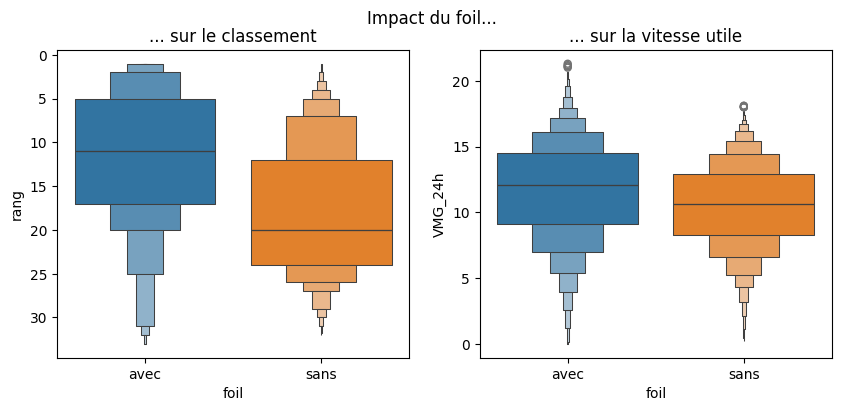

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def impact_foil(df):
    tab = df[['foil', 'rang', 'VMG_24h']].copy()
    tab['foil'] = tab['foil'].map({0: 'sans', 1: 'avec'})
    fig = plt.figure(figsize=(10, 4))
    fig.suptitle('Impact du foil...')
    ax1 = fig.add_subplot(121)
    ax1.set_title('... sur le classement')
    sns.boxenplot(x='foil', y='rang', hue='foil', data=tab, legend=False, ax=ax1)
    ax1.yaxis.set_inverted(True)
    ax2 = fig.add_subplot(122)
    ax2.set_title('... sur la vitesse utile')
    sns.boxenplot(x='foil', y='VMG_24h', hue='foil', data=tab, legend=False, ax=ax2)
    
impact_foil(df)

## 3. Cartes de la course

On affiche 3 cartes de la course pour les 11 premiers, les 11 suivants et ainsi de suite.

In [ ]:
#vg.show_globe(df, 0, 11)

In [ ]:
#vg.show_globe(df, 11, 22)

In [ ]:
#vg.show_globe(df, 22, 33)

## 4. Impact du foil sur différents paramètres

On calcule l'impact du foil sur différents paramètres et présenté soit dans le temps soit selon la distance à l'arrivée.

In [ ]:
#vg.interact(df)

## 5. Impact des facteurs sur le classement

Pour les facteurs numériques, on calcule par la méthode de SHAP l'impact de leur grandeur sur le classement :
<ul>
    <li>Des facteurs comme les voiliers légers (facteur *Déplacement (poids)* en bleu), les voiliers plus larges (facteur *Largeur* en rouge), ou la présence d'un foil (facteur *foil* en rouge) ont une influence positive sur le classement.</li>
    <li>Inversement, les voiliers plus lourds (facteur *Déplacement (poids)* en rouge), les voiliers plus étroits (facteur *Largeur* en bleu) ou l'absence de foil (facteur *foil* en bleu) ont une influence négative sur le classement.</li>
</ul>
        
*Nota bene* : pour le calcul de l'impact, on a utilisé l'opposé du rang pour obtenir un graphique dans lequel les effets positifs sont à droite et les effets négatifs à gauche.

In [ ]:
#vg.show_shap_values(df)